In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from data_loader import *
from indexer import Indices, SectorIndex
from datetime import datetime, timedelta
from tqdm import tqdm
# from key_indices import KeyIndices

In [20]:
market_cap_data = pd.read_csv("bi-annual_nse_market_cap_data.csv", index_col=0, parse_dates=True)
market_cap_data = market_cap_data.drop('JAIBALAJI', axis=1)
custom_date_range = pd.date_range(start='2007-09-17', end='2024-06-30', freq='D')
market_cap_data = market_cap_data.reindex(custom_date_range).ffill()

bse_stock_data = pd.read_csv('bse_stocks_list.csv')
bse_stock_data = bse_stock_data[bse_stock_data['Industry New Name'] != '-']
bse_stock_data = bse_stock_data[bse_stock_data['Status'] == 'Active']

df_3M = pd.read_csv('adjusted-data-with-volume-percent/BERGEPAINT.csv', index_col=0, parse_dates=True).loc['2007-09-17':].drop_duplicates()

In [21]:
def prepare_data(data_path):
    df = pd.read_csv(data_path)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df = df.rename(columns={'Price': 'Open'})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.dropna()
    df.set_index('Date', inplace=True)
    return df

In [13]:
# def fetch_market_cap_data(date=None):
#     market_cap_data = pd.read_csv("bi-annual_nse_market_cap_data.csv", index_col=0, parse_dates=True)
#     market_cap_data = market_cap_data.drop('JAIBALAJI', axis=1)
#     custom_date_range = pd.date_range(start='2007-09-17', end='2024-06-30', freq='D')
#     market_cap_data = market_cap_data.reindex(custom_date_range).ffill()

#     bse_stock_data = pd.read_csv('bse_stocks_list.csv')
#     bse_stock_data = bse_stock_data[bse_stock_data['Industry New Name'] != '-']
#     bse_stock_data = bse_stock_data[bse_stock_data['Status'] == 'Active']

#     df_3M = pd.read_csv('adjusted-data-with-volume-percent/BERGEPAINT.csv', index_col=0, parse_dates=True).loc['2007-09-17':].drop_duplicates()

#     if date:
#         return market_cap_data.loc[:date]
#     else:
#         return market_cap_data

In [ ]:
# fetch_market_cap_data()

In [22]:
exchange = 'adjusted-data-with-volume-percent/'
price_key = 'Open Price'
df_3M = pd.read_csv('adjusted-data-with-volume-percent/BERGEPAINT.csv', index_col=0, parse_dates=True).loc['2007-09-17':].drop_duplicates()
lst = [f for f in os.listdir(exchange+'/')]

df = pd.DataFrame({})

for filename in lst:
    srs = pd.read_csv(exchange+'/'+filename, index_col=0, parse_dates=True)[price_key]
    srs = srs.groupby(srs.index).first()
    srs = srs.reindex(df_3M.index)
    df[filename[:-4]] = srs

In [16]:
# bse_stock_data = pd.read_csv('bse_stocks_list.csv')
# bse_stock_data = bse_stock_data[bse_stock_data['Industry New Name'] != '-']
# bse_stock_data = bse_stock_data[bse_stock_data['Status'] == 'Active']

# market_cap_data = pd.read_csv("bi-annual_nse_market_cap_data.csv", index_col=0, parse_dates=True)
# market_cap_data = market_cap_data.drop('JAIBALAJI', axis=1)

In [23]:
def get_industry_mcap_data(market_cap_data, industry_name):
    stocks_list = bse_stock_data[bse_stock_data['Industry New Name'] == industry_name]['Security Id'].values
    return market_cap_data.filter(stocks_list)

In [24]:
names_dict = {
    'Capital Goods': "CAPITALGOODS",
     'Oil, Gas & Consumable Fuels': "ENERGY",
     'Automobile and Auto Components': "AUTO",
     'Healthcare': "HEALTHCARE",
     'Chemicals': "CHEMICAL",
     'Metals & Mining': "METAL",
     'Consumer Services': "SERVICE",
     'Textiles': "COMMODITY",
     'Consumer Durables': "CONSUMER",
     'Fast Moving Consumer Goods': "FMCG",
     'Financial Services': "FINSERV",
     'Forest Materials': "COMMODITY",
     'Media, Entertainment & Publication': "MEDIA",
     'Telecommunication': "TELECOM",
     'Power': "ENERGY",
     'Realty': "REALTY",
     'Services': "SERVICE",
     'Diversified': "MISCELLANEOUS",
     'Information Technology': "IT",
     'Construction': "CONSTRUCTION",
     'Construction Materials': "CONSTRUCTION",
     'Utilities': "MISCELLANEOUS"
}

bse_stock_data['Industry New Name'] = bse_stock_data['Industry New Name'].map(names_dict)
industry_list = bse_stock_data['Industry New Name'].unique().tolist()

In [25]:
industry_list

['CAPITALGOODS',
 'ENERGY',
 'AUTO',
 'HEALTHCARE',
 'CHEMICAL',
 'METAL',
 'SERVICE',
 'COMMODITY',
 'CONSUMER',
 'FMCG',
 'FINSERV',
 'MEDIA',
 'TELECOM',
 'REALTY',
 'MISCELLANEOUS',
 'IT',
 'CONSTRUCTION']

In [26]:
get_industry_mcap_data(market_cap_data, 'AUTO')

,ARE&M,BANCOINDIA,EXIDEIND,HEROMOTOCO,LGBBROSLTD,MRF,SUNDRMFAST,UCAL,HINDMOTORS,M&M,...,SJS,MSUMI,LANDMARK,DIVGIITTS,PAVNAIND,URAVI,ASKAUTOLTD,IMPAL,SUNDRMBRAK,WHEELS
2007-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,13891.035,4267.512,25558.899,79349.505,3731.121,53618.575,25351.541,285.326,364.121,208411.363,...,1973.897,28314.132,3133.808,2974.032,578.989,329.066,5750.379,1225.007,250.413,1651.599
2024-06-27,13891.035,4267.512,25558.899,79349.505,3731.121,53618.575,25351.541,285.326,364.121,208411.363,...,1973.897,28314.132,3133.808,2974.032,578.989,329.066,5750.379,1225.007,250.413,1651.599
2024-06-28,13891.035,4267.512,25558.899,79349.505,3731.121,53618.575,25351.541,285.326,364.121,208411.363,...,1973.897,28314.132,3133.808,2974.032,578.989,329.066,5750.379,1225.007,250.413,1651.599
2024-06-29,13891.035,4267.512,25558.899,79349.505,3731.121,53618.575,25351.541,285.326,364.121,208411.363,...,1973.897,28314.132,3133.808,2974.032,578.989,329.066,5750.379,1225.007,250.413,1651.599


In [57]:
full_data = df.copy()
full_pct_data = full_data.pct_change()

In [42]:
mcap_data = get_industry_mcap_data(market_cap_data, 'FMCG')
sector_class = SectorIndex(mcap_data)

sector_class.get_top_20(date= '2024-01-01')

Index(['HINDUNILVR', 'ITC', 'NESTLEIND', 'BRITANNIA', 'VBL', 'GODREJCP',
       'DABUR', 'TATACONSUM', 'MARICO', 'AWL', 'PGHH', 'COLPAL', 'PATANJALI',
       'UBL', 'HATSUN', 'EMAMILTD', 'GILLETTE', 'RADICO', 'BIKAJI', 'RENUKA'],
      dtype='object')

In [43]:
index_data = {}
for filename in os.listdir("C:/Users/Jaisal Singh/Desktop/Office/New folder/ANJ_Sector_Data"):
    if filename.endswith(".csv"):
        sector_name = filename.split("_")[0]
        df = prepare_data(f"C:/Users/Jaisal Singh/Desktop/Office/New folder/ANJ_Sector_Data/{filename}")
        index_data[sector_name] = df

In [52]:
def get_all_sector_stocks():
    for sector in industry_list:
        globals()[f"{sector}_list"] = get_sector_stocks(sector)

get_all_sector_stocks()

In [53]:
AUTO_list

['ARE&M',
 'FORCEMOT',
 'BANCOINDIA',
 'EXIDEIND',
 'GOODYEAR',
 'HEROMOTOCO',
 'KINETICENG',
 'LGBBROSLTD',
 'MRF',
 'RUBFILA',
 'SUNDRMFAST',
 'UCAL',
 'HINDMOTORS',
 'M&M',
 'BOSCHLTD',
 'TATAMOTORS',
 'APOLLOTYRE',
 'CEATLTD',
 'MODIRUBBER',
 'BALKRISIND',
 'BGWTATO',
 'DUNCANENG',
 'AUTOAXLES',
 'ACGL',
 'SETCO',
 'INRADIA',
 'SCOOTER',
 'TALBROAUTO',
 'ZFSTEERING',
 'EICHERMOT',
 'JAINEX',
 'VELJAN',
 'BIMETAL',
 'BHARATGEAR',
 'HIMTEK',
 'GABRIEL',
 'FMGOETZE',
 'SCHAEFFLER',
 'SNL',
 'HINDHARD',
 'TRITONV',
 'PANKAJPIYUS',
 'SIMMOND',
 'COCHMAL',
 'ISTLTD',
 'INDAG',
 'MMRUBBR-B',
 'TVSSRICHAK',
 'HINDCOMPOS',
 'GSAUTO',
 'AMFORG',
 'JAYUSH',
 'SSWL',
 'PRADPME',
 'SPECTRA',
 'ASAHIINDIA',
 'SAINTGOBAIN',
 'SUBROS',
 'LUMAXIND',
 'HBLPOWER',
 'MOTHERSON',
 'IGARASHI',
 'RAJRATAN',
 'RICOAUTO',
 'OMAXAUTO',
 'MUNJALSHOW',
 'JAMNAAUTO',
 'TVSHLTD',
 'JTEKTINDIA',
 'MUNJALAU',
 'JAYBARMARU',
 'RACLGEAR',
 'SAMKRG',
 'ASAL',
 'SIBARAUT',
 'HITECHGEAR',
 'FRONTSP',
 'RASANDIK',
 'BH

In [82]:
sector_dataframes = {}
def fetch_sector_data(data_dir):
#Fetches stock data inside each sector    
    # sector_dataframes = {}
    for sector in industry_list:
        stocks = globals()[f"{sector}_list"]
        sector_df = pd.DataFrame()
       
        for stock in stocks:
            file_path = os.path.join(data_dir, f"{stock}.csv")
           
            if os.path.exists(file_path):
                stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
                stock_data = stock_data[~stock_data.index.duplicated(keep='first')]
                sector_df[stock] = stock_data['Open Price']
       
        sector_df.sort_index(inplace=True)
        sector_dataframes[sector] = sector_df

        globals()[f"{sector}_df"] = sector_dataframes[sector]
    
    return sector_dataframes

# saved as 'sectorname'_df


fetch_sector_data(data_dir = r"C:\Users\Jaisal Singh\Desktop\Office\New folder\Adjusted_Data")

{'CAPITALGOODS':                ABB    BEML         BEL  CENTEXT     CGPOWER        BHEL  \
 2007-09-16  1200.0  1225.0    9.667778     4.70  174.971429  252.666667   
 2007-09-17  1212.0  1230.0    9.805556     4.50  178.171429  252.533333   
 2007-09-18  1250.0  1250.0   10.166667     4.50  180.771429  257.333333   
 2007-09-19  1268.0  1240.0   10.166667     4.60  181.142857  259.600000   
 2007-09-20  1280.0  1270.0   10.083333     4.25  185.714286  257.480000   
 ...            ...     ...         ...      ...         ...         ...   
 2024-03-20  5760.0  2909.8  190.000000    19.00  510.000000  229.900000   
 2024-03-21  5875.0  3012.0  196.500000    19.75  541.400000  235.000000   
 2024-03-25  5881.0  3052.3  197.000000    20.90  528.000000  238.500000   
 2024-03-26  6110.0  3120.0  200.000000    19.80  544.500000  241.350000   
 2024-03-27  6280.0  3190.0  200.500000      NaN  551.050000  253.050000   
 
             ELECTCAST  ESABINDIA      EPL  ESTER  ...  RISHABH  RATNA

In [83]:
sector_dataframes

{'CAPITALGOODS':                ABB    BEML         BEL  CENTEXT     CGPOWER        BHEL  \
 2007-09-16  1200.0  1225.0    9.667778     4.70  174.971429  252.666667   
 2007-09-17  1212.0  1230.0    9.805556     4.50  178.171429  252.533333   
 2007-09-18  1250.0  1250.0   10.166667     4.50  180.771429  257.333333   
 2007-09-19  1268.0  1240.0   10.166667     4.60  181.142857  259.600000   
 2007-09-20  1280.0  1270.0   10.083333     4.25  185.714286  257.480000   
 ...            ...     ...         ...      ...         ...         ...   
 2024-03-20  5760.0  2909.8  190.000000    19.00  510.000000  229.900000   
 2024-03-21  5875.0  3012.0  196.500000    19.75  541.400000  235.000000   
 2024-03-25  5881.0  3052.3  197.000000    20.90  528.000000  238.500000   
 2024-03-26  6110.0  3120.0  200.000000    19.80  544.500000  241.350000   
 2024-03-27  6280.0  3190.0  200.500000      NaN  551.050000  253.050000   
 
             ELECTCAST  ESABINDIA      EPL  ESTER  ...  RISHABH  RATNA

In [88]:
def get_fut_pct_change(end_date):
    start_date = pd.to_datetime('2007-09-29')

    fut_pct_change = {sector: df.pct_change().shift(-1) for sector, df in sector_dataframes.items()}
    sector_fut_pct_change = {sector: pd.DataFrame() for sector in industry_list}

    total_periods = ((end_date.year - start_date.year) * 2) + ((end_date.month - start_date.month) // 6) + 1

    for period_start in tqdm(pd.date_range(start_date, end_date, freq='6M'), total=total_periods, desc="Processing 6-month periods"):
        period_end = period_start + pd.DateOffset(months=6) - pd.Timedelta(days=1)
        period_end = min(period_end, end_date)
        date_str = period_start.strftime('%Y-%m-%d')
        
        for sector in industry_list:
            mcap_data = get_industry_mcap_data(market_cap_data, sector)
            sector_class = SectorIndex(mcap_data)
            top_20 = sector_class.get_top_20(date=date_str)
            
            # Filter fut_pct_change for the current period and top 20 stocks
            period_data = fut_pct_change[sector].loc[period_start:period_end, top_20]
            
            # Reset column names to numeric indices
            period_data.columns = range(len(period_data.columns))
            
            # Append the data to the sector's DataFrame
            sector_fut_pct_change[sector] = pd.concat([sector_fut_pct_change[sector], period_data])

    for sector in industry_list:
        sector_fut_pct_change[sector].sort_index(inplace=True)

    print("Processing complete.")
    
    for sector in industry_list:
        globals()[f"{sector}_fut_pct_change"] = sector_fut_pct_change[sector]
    
    return sector_fut_pct_change


In [89]:
get_fut_pct_change(end_date= pd.to_datetime('2024-01-01'))

Processing 6-month periods:   0%|          | 0/33 [00:00<?, ?it/s]


KeyError: "['GODREJIND'] not in index"

In [390]:
# Define the start and end dates
end_date = pd.to_datetime('2024-06-28')
# Call the function
sector_fut_pct_change = get_fut_pct_change(end_date)

Processing 6-month periods: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]

Processing complete.


In [391]:
def get_hist_pct_change(window): #calculate hist_pct_change of each stock in each sector
    for sector in industry_list:
        globals()[f"{sector}_hist_pct_change"] = globals()[f"{sector}_df"].pct_change(periods=window)

In [353]:
get_hist_pct_change(20)

AUTO_hist_pct_change

,ARE&M,BANCOINDIA,EXIDEIND,HEROMOTOCO,LGBBROSLTD,MRF,SUNDRMFAST,UCAL,HINDMOTORS,M&M,...,MSUMI,LANDMARK,DIVGIITTS,PAVNAIND,URAVI,ASKAUTOLTD,SUNCLAY,IMPAL,SUNDRMBRAK,WHEELS
2007-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20,-0.104019,-0.121865,-0.070970,-0.007051,-0.022542,-0.115170,-0.086996,-0.151879,-0.167076,-0.005879,...,-0.109843,-0.053286,-0.082880,0.015217,-0.075859,-0.135326,-0.141971,-0.135548,-0.137001,-0.037080
2024-03-21,-0.100172,-0.119396,-0.084705,0.000838,0.015315,-0.122962,-0.071115,-0.095874,-0.148883,-0.031407,...,-0.121593,-0.017184,-0.081800,0.009423,0.184674,-0.126872,-0.156197,-0.109455,-0.148211,-0.051660
2024-03-25,-0.091015,-0.132105,-0.078689,0.035378,0.013400,-0.124992,-0.055288,-0.066002,-0.147059,-0.029354,...,-0.101408,-0.023848,-0.076520,0.091434,0.115505,-0.116238,-0.080604,-0.099357,-0.165111,-0.043404
2024-03-26,-0.079884,-0.109907,-0.074035,0.042250,0.071239,-0.113499,-0.051744,-0.147461,-0.180000,-0.029128,...,-0.110959,-0.054645,-0.060435,0.058847,0.139092,-0.119903,-0.115774,-0.098775,-0.099134,-0.102187


In [411]:
def calculate_market_trend(sector_name):
    # Get the historical percentage change data for the sector
    hist_pct_change = globals()[f"{sector_name}_hist_pct_change"]
    
    # Initialize an empty DataFrame to store the results
    trend_data = pd.DataFrame(index=hist_pct_change.index)
    
    # Include the Open price for each sector
    trend_data['Open'] = index_data[sector_name]
    
    # Calculate the number of positive and negative stocks
    trend_data['positive_stocks'] = (hist_pct_change > 0).sum(axis=1)
    trend_data['negative_stocks'] = (hist_pct_change < 0).sum(axis=1)
    trend_data['total_stocks'] = trend_data['positive_stocks'] + trend_data['negative_stocks']
    trend_data['EMA_90'] = ta.ema(trend_data['Open'], window=90)
    
    # Calculate the Advance/Decline ratio
    trend_data['ad_ratio'] = trend_data.apply(lambda row: row['positive_stocks'] / row['total_stocks'] if row['negative_stocks'] != 0 else float('inf'), axis=1)
    trend_data['EMA Trend'] = trend_data.apply(lambda row: 'Bullish' if row['EMA_90'] < row['Open'] else ('Bearish' if row['EMA_90'] > row['Open'] else 'Neutral'), axis=1)
    # Remove infinite values
    trend_data = trend_data[~trend_data['ad_ratio'].isin([float('inf'), -float('inf')])]

    # Determine the overall market trend based on the A/D ratio
    trend_data['Market_Trend'] = trend_data['ad_ratio'].apply(lambda x: 'Bullish' if x > 0.6 else ('Bearish' if x < 0.4 else 'Neutral'))
    
    return trend_data

# Initialize dictionary to store trend data for each sector
sector_trend_data = {}

# Calculate trend data for all sectors in industry_list
for sector in tqdm(industry_list, desc="Processing sectors"):
    try:
        sector_name = sector.replace(' ', '_')
        sector_trend_data[sector] = calculate_market_trend(sector_name)
    except Exception as e:
        print(f"Error processing sector: {sector}")
        print(f"Error details: {str(e)}")

for sector in industry_list:
    globals()[f"{sector}_trend_data"] = sector_trend_data[sector]

# Create an empty DataFrame to store the trends
all_sectors_trend = pd.DataFrame()

for sector in industry_list:
    all_sectors_trend[sector] = sector_trend_data[sector]['Market_Trend']

# Ensure the index is in datetime format
all_sectors_trend.index = pd.to_datetime(all_sectors_trend.index)

Processing sectors: 100%|██████████| 17/17 [00:01<00:00, 11.46it/s]


In [414]:
calculate_market_trend('AUTO')

,Open,positive_stocks,negative_stocks,total_stocks,EMA_90,ad_ratio,EMA Trend,Market_Trend
2007-10-15,5304.506641,20,37,57,5126.895315,0.350877,Bullish,Bearish
2007-10-16,5419.737542,12,45,57,5180.139356,0.210526,Bullish,Bearish
2007-10-17,5083.452759,19,38,57,5162.559975,0.333333,Bearish,Bearish
2007-10-18,5292.582980,15,42,57,5186.200521,0.263158,Bullish,Bearish
2007-10-21,NaN,9,48,57,5186.200521,0.157895,Neutral,Bearish
...,...,...,...,...,...,...,...,...
2024-03-20,62543.300815,16,78,94,62684.454951,0.170213,Bearish,Bearish
2024-03-21,62911.074160,21,73,94,62725.658443,0.223404,Bullish,Bearish
2024-03-25,NaN,18,76,94,62725.658443,0.191489,Neutral,Bearish
2024-03-26,64203.039974,17,77,94,63041.215663,0.180851,Bullish,Bearish


In [415]:
def fetch_all_trend(date=None):
    # Create an empty DataFrame to store the trends
    all_sectors_trend = pd.DataFrame()

    for sector in industry_list:
        all_sectors_trend[sector] = sector_trend_data[sector]['Market_Trend']

    # Ensure the index is in datetime format
    all_sectors_trend.index = pd.to_datetime(all_sectors_trend.index)

    if date:
        return all_sectors_trend.loc[date]
    else:
        return all_sectors_trend

In [408]:
fut_pct_change

,20MICRONS,21STCENMGM,360ONE,3IINFOLTD,3MINDIA,3PLAND,5PAISA,63MOONS,A2ZINFRA,AAATECH,...,ZFCVINDIA,ZIMLAB,ZODIAC,ZODIACLOTH,ZOMATO,ZOTA,ZUARI,ZUARIIND,ZYDUSLIFE,ZYDUSWELL
2007-09-17,NaN,NaN,NaN,NaN,-0.005814,-0.061755,NaN,0.010267,NaN,NaN,...,NaN,NaN,NaN,0.012099,NaN,NaN,NaN,0.005535,0.028259,NaN
2007-09-18,NaN,NaN,NaN,NaN,-0.025585,0.018476,NaN,0.052846,NaN,NaN,...,NaN,NaN,NaN,-0.007075,NaN,NaN,NaN,0.100917,-0.002383,NaN
2007-09-19,NaN,NaN,NaN,NaN,0.038260,-0.022676,NaN,-0.030849,NaN,NaN,...,NaN,NaN,NaN,-0.040049,NaN,NaN,NaN,-0.033167,-0.019108,NaN
2007-09-20,NaN,NaN,NaN,NaN,-0.017341,-0.001160,NaN,0.086013,NaN,NaN,...,NaN,NaN,NaN,-0.019452,NaN,NaN,NaN,-0.034649,-0.009091,NaN
2007-09-21,NaN,NaN,NaN,NaN,-0.014706,-0.065041,NaN,0.008437,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.042857,0.012451,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30,0.002686,0.019916,0.016566,-0.003489,1067.169619,0.037838,-0.015190,0.051018,-0.000497,0.085607,...,-0.008445,0.008257,0.019974,0.000743,0.002908,-0.027080,0.051625,0.037403,-0.008819,0.001966
2024-07-31,-0.023214,0.019889,0.031451,-0.003501,-0.009662,-0.022135,0.026915,0.061008,-0.000498,0.033058,...,0.001631,0.004310,0.019990,0.002972,0.014894,0.014667,0.047727,-0.019905,0.028612,0.005011
2024-08-01,-0.042048,0.019974,-0.027129,-0.027027,-0.003208,-0.007457,-0.030242,-0.020125,-0.020408,-0.033417,...,-0.009691,-0.037682,0.006533,-0.022741,0.058442,0.042214,-0.052495,-0.042023,-0.021110,-0.036935
2024-08-02,0.068893,0.019930,-0.072602,-0.027778,-0.006083,-0.000537,-0.043659,-0.012246,-0.013720,-0.043021,...,0.017698,-0.014361,-0.026624,-0.052149,0.038855,0.063357,-0.038462,-0.064400,-0.018971,-0.040833


In [356]:
future_pct_change_data = pd.DataFrame() 

for sector in industry_list:
    globals()[f"{sector}_fut_pct_change"] = sector_fut_pct_change[sector]
    sector_mean = globals()[f"{sector}_fut_pct_change"].groupby(level=0).mean()
    
    # Ensure we're assigning a Series, not a DataFrame
    if isinstance(sector_mean, pd.DataFrame):
        future_pct_change_data[sector] = sector_mean.iloc[:, 0]  # Take the first column if it's a DataFrame
    else:
        future_pct_change_data[sector] = sector_mean

future_pct_change_data.tail()

,CAPITALGOODS,ENERGY,AUTO,HEALTHCARE,CHEMICAL,METAL,SERVICE,COMMODITY,CONSUMER,FMCG,FINSERV,MEDIA,TELECOM,REALTY,MISCELLANEOUS,IT,CONSTRUCTION
2024-06-24,0.039652,-0.001747,0.001675,0.015593,-0.012200,0.005964,0.012104,0.020431,0.009526,0.001786,0.014633,-0.019519,0.022825,-0.010006,0.001371,0.002166,0.010269
2024-06-25,-0.001386,0.002114,-0.006917,0.002637,-0.012557,-0.011140,-0.015464,-0.001057,-0.003238,-0.000963,0.022051,-0.011827,-0.013285,-0.018490,-0.002637,0.007205,0.012512
2024-06-26,-0.019106,0.046817,0.006850,0.015313,-0.000208,0.002509,0.009414,-0.006792,-0.009261,0.005314,-0.006938,0.014561,0.034666,0.001272,-0.013064,-0.003512,-0.000986
2024-06-27,0.006458,0.011412,-0.001234,-0.003279,0.021289,0.004092,0.016608,-0.004428,0.003145,0.005327,0.000884,-0.009109,0.049351,-0.011494,0.004423,0.022657,-0.015970
2024-06-28,-0.005473,0.020574,-0.011485,0.000559,-0.009391,-0.003150,-0.035694,0.001914,0.000414,-0.000792,-0.010368,-0.001323,0.000000,0.011016,-0.013629,-0.008627,-0.001356


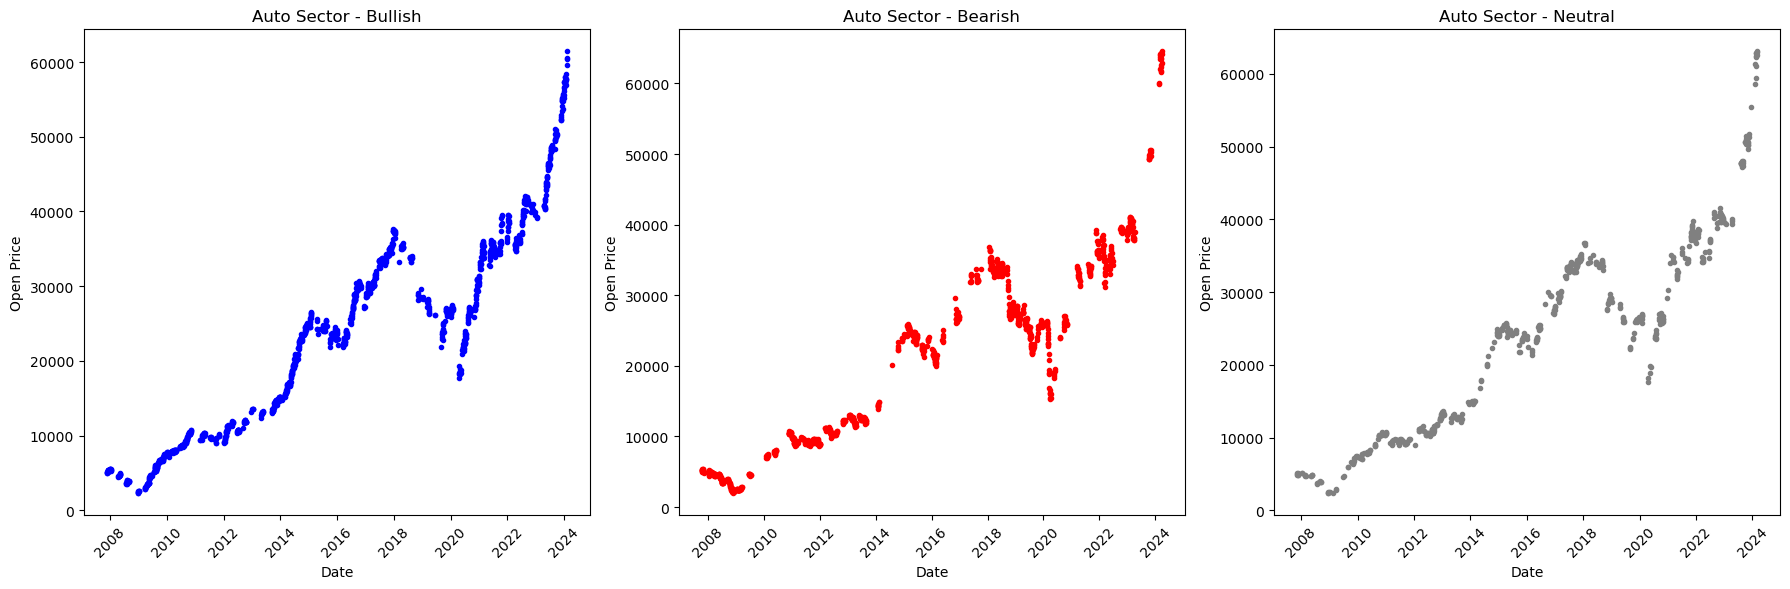

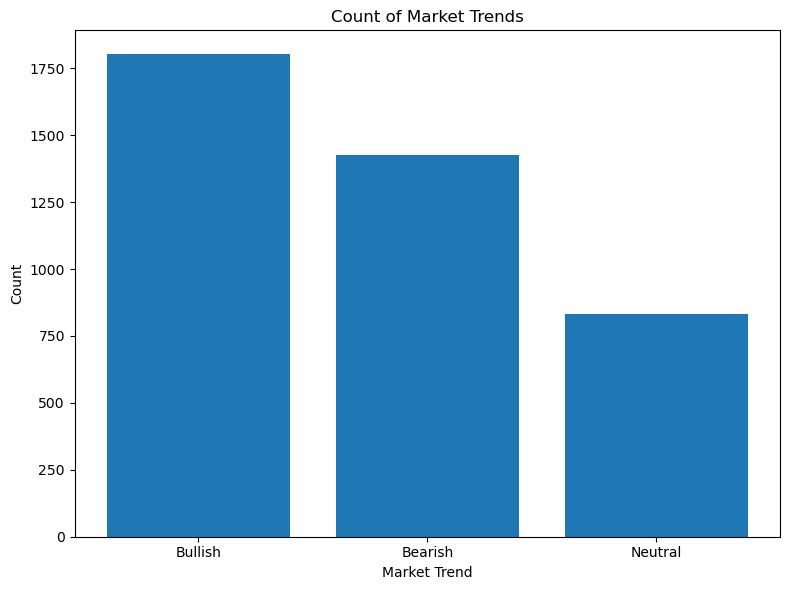

In [357]:
plt.figure(figsize=(18, 6))

sector = 'AUTO'
trends = ['Bullish', 'Bearish', 'Neutral']
colors = ['blue', 'red', 'gray']

for i, trend in enumerate(trends):
    plt.subplot(1, 3, i+1)
    trend_data = sector_trend_data[sector][sector_trend_data[sector]['Market_Trend'] == trend]
    # trend_data = trend_data['2020':'2021']  # Filter data for 2014-2016
    plt.scatter(trend_data.index, trend_data['Open'], c=colors[i], marker='.')
    plt.title(f'{sector.capitalize()} Sector - {trend}')
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Bar graph for count of each trend
plt.figure(figsize=(8, 6))
trend_counts = sector_trend_data[sector]['Market_Trend'].value_counts() 
plt.bar(trend_counts.index, trend_counts.values)
plt.title('Count of Market Trends')
plt.xlabel('Market Trend')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [358]:
AUTO_hist_pct_change

,ARE&M,BANCOINDIA,EXIDEIND,HEROMOTOCO,LGBBROSLTD,MRF,SUNDRMFAST,UCAL,HINDMOTORS,M&M,...,MSUMI,LANDMARK,DIVGIITTS,PAVNAIND,URAVI,ASKAUTOLTD,SUNCLAY,IMPAL,SUNDRMBRAK,WHEELS
2007-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20,-0.104019,-0.121865,-0.070970,-0.007051,-0.022542,-0.115170,-0.086996,-0.151879,-0.167076,-0.005879,...,-0.109843,-0.053286,-0.082880,0.015217,-0.075859,-0.135326,-0.141971,-0.135548,-0.137001,-0.037080
2024-03-21,-0.100172,-0.119396,-0.084705,0.000838,0.015315,-0.122962,-0.071115,-0.095874,-0.148883,-0.031407,...,-0.121593,-0.017184,-0.081800,0.009423,0.184674,-0.126872,-0.156197,-0.109455,-0.148211,-0.051660
2024-03-25,-0.091015,-0.132105,-0.078689,0.035378,0.013400,-0.124992,-0.055288,-0.066002,-0.147059,-0.029354,...,-0.101408,-0.023848,-0.076520,0.091434,0.115505,-0.116238,-0.080604,-0.099357,-0.165111,-0.043404
2024-03-26,-0.079884,-0.109907,-0.074035,0.042250,0.071239,-0.113499,-0.051744,-0.147461,-0.180000,-0.029128,...,-0.110959,-0.054645,-0.060435,0.058847,0.139092,-0.119903,-0.115774,-0.098775,-0.099134,-0.102187


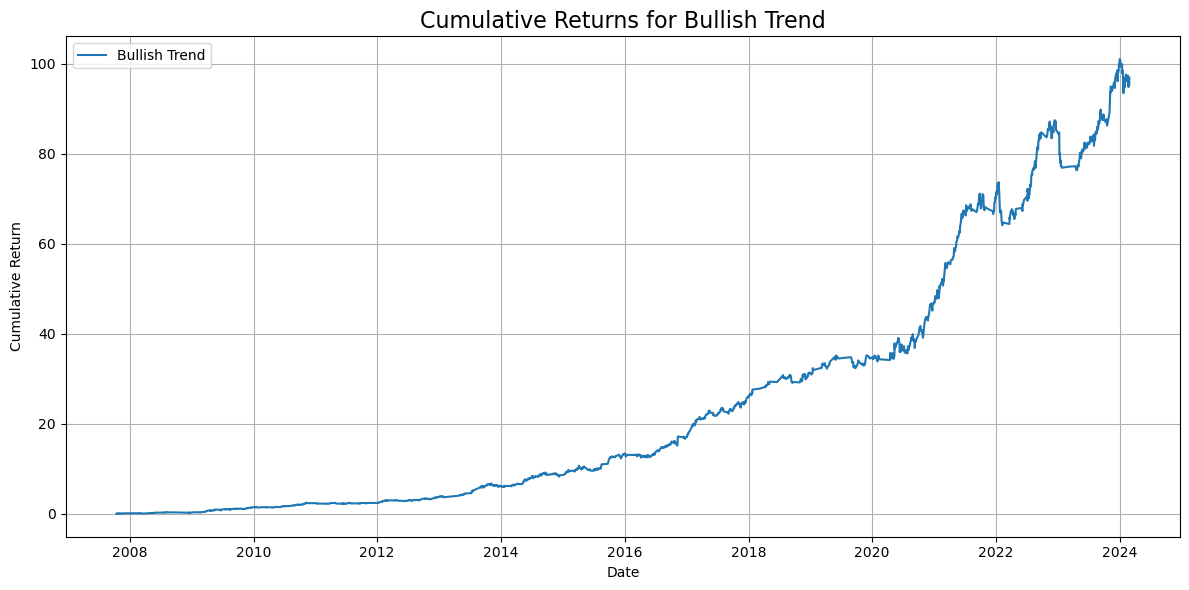

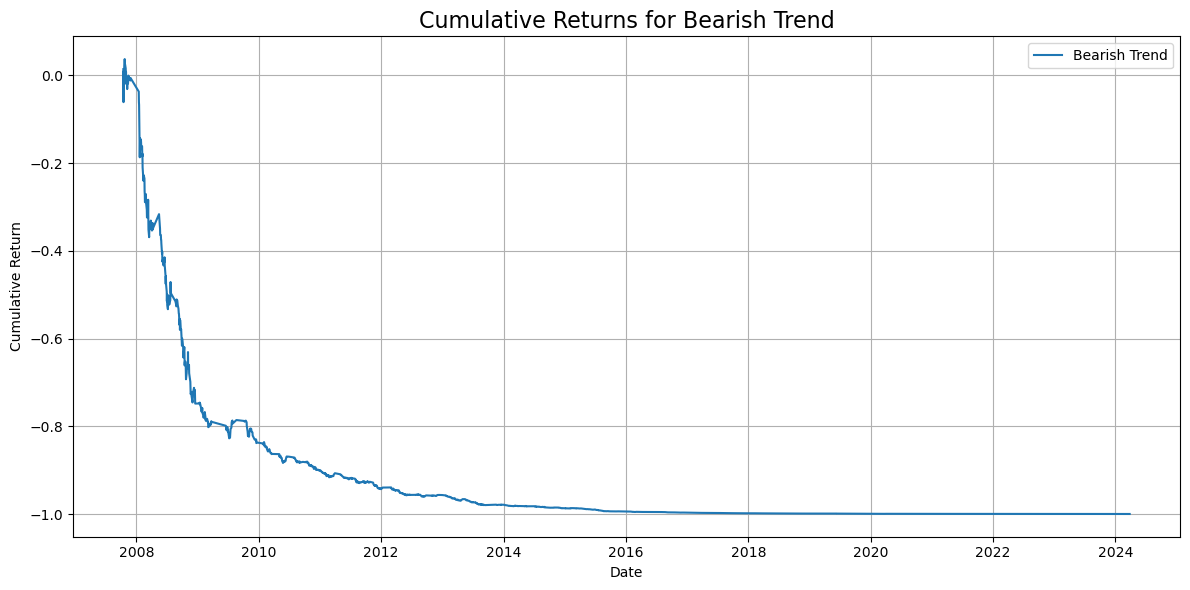

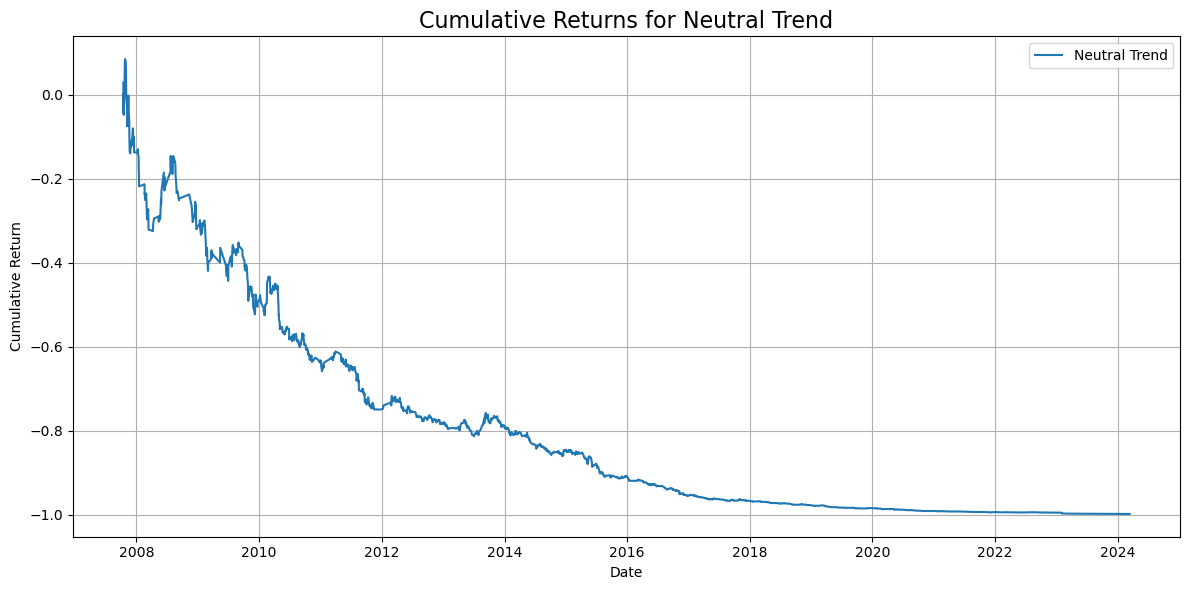

In [359]:
# Assuming all_sectors_trend is already created
trend_data = all_sectors_trend.copy()

# Calculate future percentage change
# future_pct_change_data = df.pct_change().shift(-1)

# Calculate daily mean future returns for each trend
bullish_mean_returns = []
bearish_mean_returns = []
neutral_mean_returns = []

for Date in future_pct_change_data.index:
    if Date not in trend_data.index:
        continue
    
    bullish_sectors = trend_data.loc[Date][trend_data.loc[Date] == 'Bullish'].index
    bearish_sectors = trend_data.loc[Date][trend_data.loc[Date] == 'Bearish'].index
    neutral_sectors = trend_data.loc[Date][trend_data.loc[Date] == 'Neutral'].index
    
    if not bullish_sectors.empty:
        bullish_daily_mean = future_pct_change_data.loc[Date, bullish_sectors].mean()
        bullish_mean_returns.append((Date, bullish_daily_mean))
    
    if not bearish_sectors.empty:
        bearish_daily_mean = future_pct_change_data.loc[Date, bearish_sectors].mean()
        bearish_mean_returns.append((Date, bearish_daily_mean))

    if not neutral_sectors.empty:
        neutral_daily_mean = future_pct_change_data.loc[Date, neutral_sectors].mean()
        neutral_mean_returns.append((Date, neutral_daily_mean))

# Create DataFrames from the results
df_bullish = pd.DataFrame(bullish_mean_returns, columns=['Date', 'Mean_Future_Return'])
df_bullish.set_index('Date', inplace=True)
df_bullish['Cumulative_Return'] = ((1 + (df_bullish['Mean_Future_Return'])).cumprod()) - 1
df_bearish = pd.DataFrame(bearish_mean_returns, columns=['Date', 'Mean_Future_Return'])
df_bearish.set_index('Date', inplace=True)
df_bearish['Cumulative_Return'] = ((1 + (df_bearish['Mean_Future_Return']-0.003)).cumprod()) - 1

df_neutral = pd.DataFrame(neutral_mean_returns, columns=['Date', 'Mean_Future_Return'])
df_neutral.set_index('Date', inplace=True)
df_neutral['Cumulative_Return'] = ((1 + (df_neutral['Mean_Future_Return']-0.003)).cumprod()) - 1

# Plot the results for Bullish Trend
plt.figure(figsize=(12, 6))
plt.plot(df_bullish.index, df_bullish['Cumulative_Return'], label='Bullish Trend')
plt.title('Cumulative Returns for Bullish Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the results for Bearish Trend
plt.figure(figsize=(12, 6))
plt.plot(df_bearish.index, df_bearish['Cumulative_Return'], label='Bearish Trend')
plt.title('Cumulative Returns for Bearish Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the results for Neutral Trend
plt.figure(figsize=(12, 6))
plt.plot(df_neutral.index, df_neutral['Cumulative_Return'], label='Neutral Trend')
plt.title('Cumulative Returns for Neutral Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

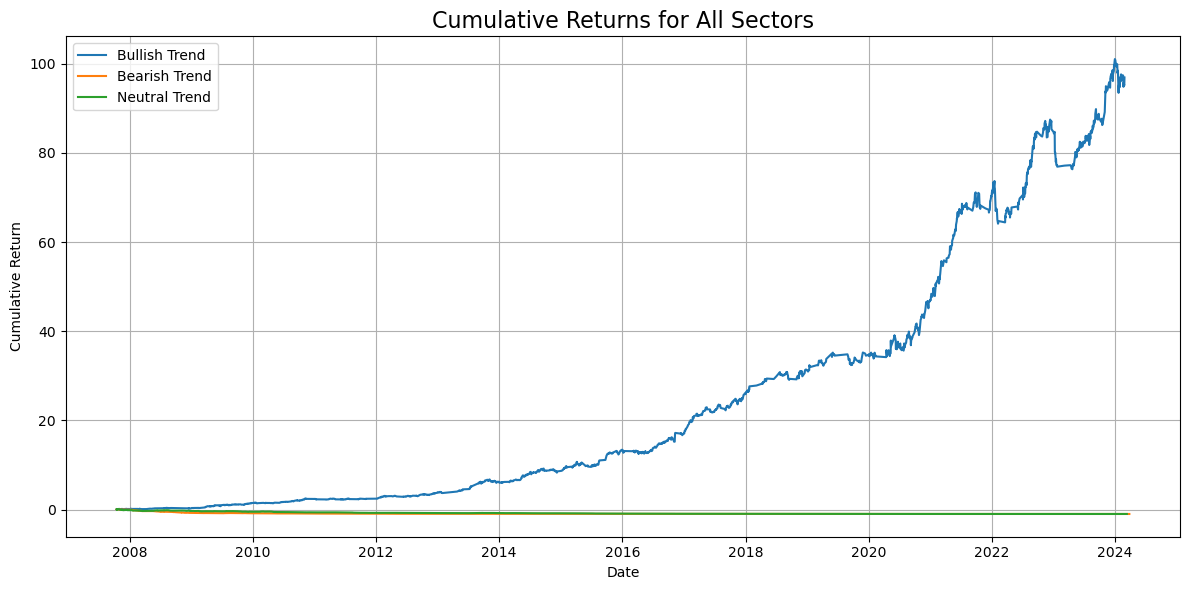

In [404]:
def calculate_returns(sector):
    if sector != 'all':
        assert sector in industry_list, f"Sector must be one of {industry_list} or 'all'"
        trend_data = globals()[f"{sector}_trend_data"]
    else:
        trend_data = all_sectors_trend.copy()

    mean_returns = {'Bullish': [], 'Bearish': [], 'Neutral': []}

    for Date in future_pct_change_data.index:
        if Date not in trend_data.index:
            continue
        
        if sector == 'all':
            for trend in ['Bullish', 'Bearish', 'Neutral']:
                trend_sectors = trend_data.loc[Date][trend_data.loc[Date] == trend].index
                if not trend_sectors.empty:
                    daily_mean = future_pct_change_data.loc[Date, trend_sectors].mean()
                    mean_returns[trend].append((Date, daily_mean))
        else:
            trend = trend_data.loc[Date, 'Market_Trend']
            daily_return = future_pct_change_data.loc[Date, sector]
            mean_returns[trend].append((Date, daily_return))

    plt.figure(figsize=(12, 6))

    for trend in ['Bullish', 'Bearish', 'Neutral']:
        df_trend = pd.DataFrame(mean_returns[trend], columns=['Date', 'Future_Return'])
        df_trend.set_index('Date', inplace=True)
        
        if trend == 'Bullish':
            df_trend['Cumulative_Return'] = ((1 + df_trend['Future_Return']).cumprod()) - 1
        else:
            df_trend['Cumulative_Return'] = ((1 + (df_trend['Future_Return'] - 0.003)).cumprod()) - 1
        
        plt.plot(df_trend.index, df_trend['Cumulative_Return'], label=f'{trend} Trend')

    plt.title(f'Cumulative Returns for {"All Sectors" if sector == "all" else sector}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

calculate_returns('all')


In [400]:
def calculate_days(sector='all'):
    holding_df = pd.DataFrame(index=['Bullish_Max', 'Bearish_Max', 'Neutral_Max',
                                     'Bullish_Min', 'Bearish_Min', 'Neutral_Min',
                                     'Bullish_Avg', 'Bearish_Avg', 'Neutral_Avg'])

    sectors_to_process = industry_list if sector == 'all' else [sector]

    for current_sector in sectors_to_process:
        sector_data = globals()[f"{current_sector}_trend_data"]
        trend_durations = sector_data['Market_Trend'].groupby((sector_data['Market_Trend'] != sector_data['Market_Trend'].shift()).cumsum())
        
        sector_stats = {}
        
        for trend in ['Bullish', 'Bearish', 'Neutral']:
            trend_specific_durations = trend_durations.apply(lambda x: x.size if x.iloc[0] == trend else None).dropna()
            
            if not trend_specific_durations.empty:
                sector_stats[f'{trend}_Max'] = trend_specific_durations.max()
                sector_stats[f'{trend}_Min'] = trend_specific_durations.min()
                sector_stats[f'{trend}_Avg'] = round(trend_specific_durations.mean(), 2)
            else:
                sector_stats[f'{trend}_Max'] = None
                sector_stats[f'{trend}_Min'] = None
                sector_stats[f'{trend}_Avg'] = None
        
        holding_df[current_sector] = pd.Series(sector_stats)

    return holding_df.transpose() if sector != 'all' else holding_df

# Usage:

# result = calculate_days()

result = calculate_days()


In [401]:
result

,CAPITALGOODS,ENERGY,AUTO,HEALTHCARE,CHEMICAL,METAL,SERVICE,COMMODITY,CONSUMER,FMCG,FINSERV,MEDIA,TELECOM,REALTY,MISCELLANEOUS,IT,CONSTRUCTION
Bullish_Max,85.00,68.00,77.00,69.00,74.00,44.00,53.00,67.00,67.00,65.00,76.00,44.00,53.00,50.00,44.00,63.00,81.00
Bearish_Max,64.00,52.00,61.00,48.00,59.00,68.00,51.00,69.00,68.00,52.00,55.00,58.00,58.00,66.00,48.00,61.00,71.00
Neutral_Max,28.00,17.00,17.00,29.00,23.00,12.00,20.00,17.00,22.00,36.00,32.00,21.00,15.00,16.00,12.00,16.00,21.00
Bullish_Min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Bearish_Min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Neutral_Min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Bullish_Avg,11.28,8.25,11.12,8.22,11.47,8.21,7.42,10.44,9.97,8.60,10.49,7.05,6.70,7.73,4.29,7.69,9.09
Bearish_Avg,11.10,9.38,11.60,8.39,10.56,9.36,9.61,10.95,9.59,8.60,10.59,8.55,8.66,11.42,5.82,7.93,10.77
Neutral_Avg,3.36,2.55,3.01,3.01,2.95,2.42,3.30,3.18,3.29,3.51,3.18,3.04,2.25,2.68,2.21,3.30,2.90
